In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import datetime as dt
import pandas_datareader.data as web
from sklearn.preprocessing import StandardScaler
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [22]:
def get_data(lusip):
    start = dt.datetime(2018, 1, 1)
    end = dt.datetime.now()
    df = web.DataReader(lusip,'yahoo', start, end)
    df.to_csv(lusip+'.csv')

In [23]:
get_data('RELIANCE.NS')

In [5]:
pd.read_csv('RELIANCE.NS.csv').shape

(848, 7)

In [17]:
def data_preprocessing(ticker):
    training_data = pd.read_csv('{}.csv'.format(ticker))
    training_data = training_data.dropna()
    training_data = training_data[['Open', 'High', 'Low', 'Close']]

    training_data['H-L'] = training_data['High'] - training_data['Low']
    training_data['O-C'] = training_data['Close'] - training_data['Open']
    
    training_data['ma_5'] = training_data['Close'].rolling(window=5).mean()
    training_data['ma_10'] = training_data['Close'].rolling(window=10).mean() 
    
    training_data['EWMA_12'] = training_data['Close'].ewm(span=12).mean() #Providing exponential weighted (EW) functions #Specify decay

    training_data['std_5'] = training_data['Close'].rolling(window=5).std()
    training_data['std_10'] = training_data['Close'].rolling(window=10).std()


    training_data['Price_Rise'] = np.where(training_data['Close'].shift(-1) > training_data['Close'], 1, 0)

    training_data = training_data.dropna()
    X = training_data.iloc[:, 4:-1]
    y = training_data.iloc[:, -1]

    split = int(len(training_data)*0.8)
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test, y_train, y_test



In [18]:
data_preprocessing('RELIANCE.NS')

(array([[-0.8305896 ,  0.26463726, -1.14148608, ..., -1.17024627,
         -0.8875829 , -0.80634473],
        [-0.8829747 , -0.00395524, -1.1291065 , ..., -1.16152815,
         -1.0258085 , -0.81050825],
        [-0.279508  , -0.94109123, -1.13992362, ..., -1.16899028,
         -0.69700163, -0.87671535],
        ...,
        [ 0.38509963, -1.22934933,  2.78875151, ...,  2.88638423,
         -0.54071468, -0.46386351],
        [-0.07601737, -0.56039997,  2.78517235, ...,  2.87868238,
         -0.46330576, -0.6206629 ],
        [ 2.32477383,  0.91998016,  2.79272508, ...,  2.89477551,
         -0.20208591, -0.44890046]]),
 array([[ 0.50143753, -0.75237876,  2.79569759, ...,  2.89964124,
         -0.17157461, -0.42449418],
        [ 0.07839062, -0.03197993,  2.80067207, ...,  2.90097707,
         -0.1738616 , -0.64956524],
        [-0.19235527,  0.11052079,  2.81574732, ...,  2.90383376,
         -0.33938227, -0.75521185],
        ...,
        [ 0.77853532, -0.3822789 ,  2.70224354, ...,  

accuracy: 0.5595238095238095
predicted class counts: Counter({1: 153, 0: 15})


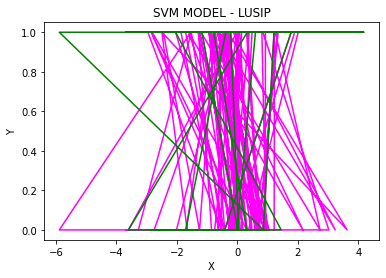

In [19]:
def svm_linear(ticker):
  X_train, X_test, y_train, y_test = data_preprocessing(ticker)
  clf = svm.SVC(kernel = 'linear')
  clf.fit(X_train, y_train)
  confidence = clf.score(X_test, y_test)
  print('accuracy:',confidence)
  predictions = clf.predict(X_test)
  print('predicted class counts:',Counter(predictions))


  plt.plot(X_test[:,1], y_test, color = 'magenta')
  plt.plot(X_test[:,1], predictions, color = 'green')
  plt.title('SVM MODEL - LUSIP')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

svm_linear('RELIANCE.NS')

In [9]:
def svm_poly(ticker):
    X_train, X_test, y_train, y_test = data_preprocessing(ticker)
    clf = svm.SVC(kernel = 'poly')
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    
svm_poly('RELIANCE.NS')

accuracy: 0.5833333333333334
predicted class counts: Counter({1: 135, 0: 33})
